<a href="https://colab.research.google.com/github/maronem/PyTorch/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

See reference notebook: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models 
* `torchvision.transforms` - for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for pytorch
* `torch.utils.data.DataLoader` - Creates a pipeline iterable over a dataset


In [135]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


## 1. Getting a dataset

We will be using [FashionMNSIT](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST)

To use dataset you need to:

1. Access the data using imagenet using torchvision: `torchvision.datasets.ImageNet('PATH')`
2. Turn the data into a data loader: `torch.utils.data.dataloader()`

In [136]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data', #where to download data to
    train=True, # do we want trianing dataset?
    download=True, #do we want to download dataset?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [137]:
len(train_data), len(test_data)

(60000, 10000)

In [138]:
# See the first training example
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [139]:
image.shape #C, H, W, C=1 means image is grayscale 

torch.Size([1, 28, 28])

In [140]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [141]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [142]:
# Check the shape of our iamge
print(f"Image Shape: {image.shape} -> C,H,W")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> C,H,W
Image Label: Ankle boot


### 1.2 Visualize our data 

Image Shape: torch.Size([1, 28, 28])


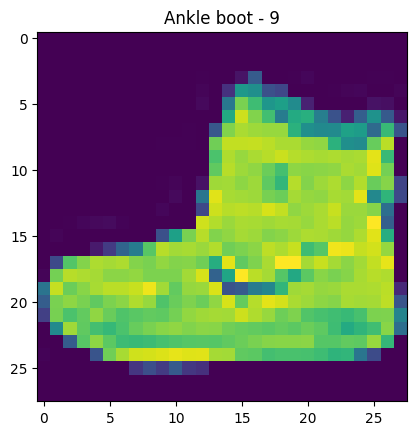

In [143]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze()) #squeeze() removes singular dimension of color, matplotlib expects only H+W
plt.title(f"{class_names[label]} - {label}");

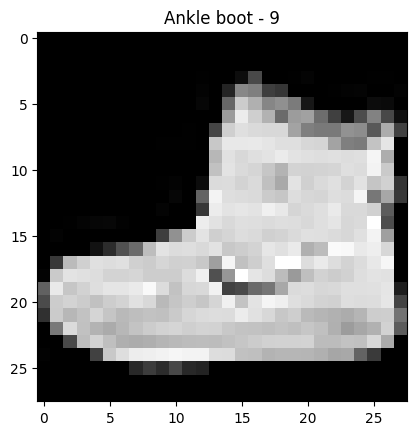

In [144]:
# Plot in greyscale
plt.imshow(image.squeeze(), cmap="gray");
plt.title(f"{class_names[label]} - {label}");

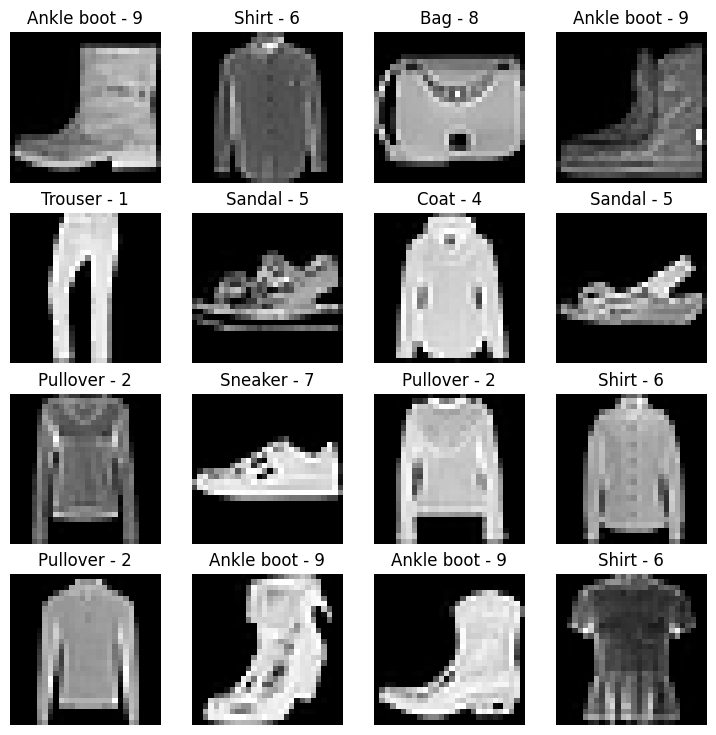

In [78]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9)) #image size 9x9
rows, cols = 4,4 # set a 4x4 grid of images

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx] # set img/label to the random indexes

  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"{class_names[label]} - {label}")
  plt.axis(False);


## 2. Prepare DataLoader

Right now our data is in the form of PyTorch DataSets

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini batches) Why?

1. It is more computationally efficient and memory compatible. So we break it down into batches such as 32 images/batch.
2. It gives our neural network more chances to update its gradients per epoch (updates parameters 1x every 32 images instead of 1x per 60,000) - [minibatch gradient descent](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)



In [79]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [80]:
# Turn datasets into DataLoaders
from torch.utils.data import DataLoader

# Set batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False) # Don't necessarily need to shuffle test data

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")                         

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f21c68dc0d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f21c71c57f0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [81]:
# Check what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


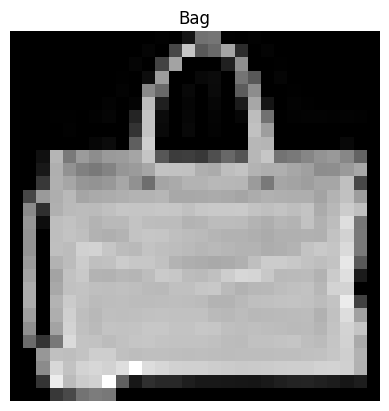

In [82]:
# Visualize single image from a batch
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when needed

In [83]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
output = flatten_model(x)

print(f"Original shape: {x.shape}") # -> [C,H,W] (3 dim)
print(f"Flattened shape: {output.shape}") # -> [C, H*W] (2 dim)

Original shape: torch.Size([1, 28, 28])
Flattened shape: torch.Size([1, 784])


In [84]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [85]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # or 28x28
    hidden_units=10, # how many units in hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [86]:
# test on dummy data
dummy_x = torch.rand([1,1,28,28])

model_0(dummy_x), model_0(dummy_x).shape

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [87]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss fn, optimizer, and evaluation metrics

* loss fn - since we are working with mutliclass data, our loss fn will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` for stochastic gradient descent
* Evaluation metrics - since we are working on classification, lets use accuracy

In [88]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py  already exists, skipping download.")
else:
  print("Downloading helper_functions.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_functions.py  already exists, skipping download.


In [89]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental, two of the main things you'll often want to track is:

1. Your model's performance (loss and accuracy, etc.)
2. How fast it runs 

`timeit` - https://docs.python.org/3/library/timeit.html

In [90]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [91]:
# Timer example

start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, 
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


4.426300029081176e-05

### 3.3 Creating a training and testing loop on batches of data

**NOTE: The optimizer will update our model's parameters once per batch instead of per epoch**

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the trian loss *per batch*
3. Loop through testing batches, perform test steps, calculate the test loss *per batch*
4. Print out what's happening 
5. Time it all (for fun)

For more on tqdm progress bar: https://tqdm.github.io/


In [92]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
from torchmetrics import Accuracy

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the manual seed and start timer
torch.manual_seed(42)
train_time_start_cpu = timer()

# Set # epochs (keep this small for faster computing time)
epochs = 3

# Create a training loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")

  ### TRAINING
  train_loss=0

  # Add loop to loop through batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
   
    # 1. Forward pass
    y_pred = model_0(X) 

    # 2. Calc loss
    loss = loss_fn(y_pred, y) 
    train_loss += loss # accumulate loss each batch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Back propagation
    loss.backward()

    # 5. Step optimizer
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### TESTING
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Foward pass
      test_pred = model_0(X_test) #logits 

      # 2. Calculate loss (cumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      acc_fn = Accuracy(task="multiclass", num_classes=10)
      test_acc += acc_fn(test_pred.argmax(dim=1), y_test) #argmax to find logit value with highest index

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out whats happening
  print(f"\nTrain loss: {train_loss:.4f}, Test loss {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Calculate training time
train_time_end_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_cpu,
                                            end=train_time_end_cpu,
                                            device=str(next(model_0.parameters()))) #provides str of device - see exmple below

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5904, Test loss 0.5095, Test Acc: 0.8204
Epoch: 1
---
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4763, Test loss 0.4799, Test Acc: 0.8320
Epoch: 2
---
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4550, Test loss 0.4766, Test Acc: 0.8343
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.000

In [94]:
# How to print out str of what device our model is on
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get model_0 results

In [95]:
## 4. Setup device agnostic code (for using GPU if there is one)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [96]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on dataloader"""
  loss, acc = 0,0
  model.eval()

  with torch.inference_mode():

    for X,y in tqdm(data_loader):

      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      #Accumulate loss and acc values
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc} 

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0.to(device),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [97]:
!nvidia-smi

Mon Apr 10 14:00:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |   1125MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 4. Recreate model using non-linearity on GPU 

In [98]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int,):

    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten inputs into a single vector
        nn.Linear(in_features=input_shape, 
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, 
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

# Instantiate model to target device (if available)
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=int(len(class_names))).to(device)
model_1, device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 'cuda')

In [99]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [100]:
# Setup loss function, optimizer, and evaluation metrics for model_1

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# Pull accuracy_fn from .py file
from helper_functions import accuracy_fn

### 6.2 Functionizing training and evaluation loops

* training loop - `train_step()`
* testing loop - `test_step()`

In [101]:
# Turn training loop into a function 

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training loop with model trying to learn on a data loader"""

  # Set cumulative loss & acc == 0
  train_loss, train_acc = 0,0

  # Put model into training mode
  model.train()

  for batch, (X,y) in enumerate(data_loader):

    #Send data to target device
    X,y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    
    # Optimizer to zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Step optimizer (gradient descent)
    optimizer.step()
  
  # Calculate loss and accuracy per epoch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.4f} | Train accuracy: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop on trained data from a data loader"""
  
  test_loss, test_acc = 0,0

  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:

      # Send data to target device
      X,y = X.to(device), y.to(device)

      # 1. Foward pass
      test_pred = model(X)

      # 2. Calculate test loss / accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # logits -> pred prob

    # Adjust metrics and print out results
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.4f} | Test accuracy: {test_acc:.2f}%")


In [102]:
# Use functionalized training/testing loops on data
from tqdm import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_start_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
  
# Measure train time
train_end_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_start_gpu,
                                            end=train_end_gpu,
                                            device=str(next(model_1.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 1.0920 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:20<00:41, 20.55s/it]

Test Loss: 0.9564 | Test accuracy: 65.00%
Epoch: 1
----
Train Loss: 0.7810 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:32<00:15, 15.22s/it]

Test Loss: 0.7223 | Test accuracy: 73.91%
Epoch: 2
----
Train Loss: 0.6703 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:43<00:00, 14.58s/it]

Test Loss: 0.6850 | Test accuracy: 75.02%
Train time on Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0087,  ..., -0.0171,  0.0077,  0.0135],
        [-0.0190, -0.0359,  0.0193,  ...,  0.0192,  0.0259,  0.0185],
        [-0.0009,  0.0020,  0.0007,  ...,  0.0185, -0.0024,  0.0076],
        ...,
        [-0.0115,  0.0276, -0.0308,  ...,  0.0693,  0.0573,  0.0039],
        [-0.0231,  0.0255,  0.0238,  ..., -0.0829, -0.0392, -0.0057],
        [ 0.0179, -0.0148,  0.0052,  ..., -0.1301, -0.0557,  0.0184]],
       device='cuda:0', requires_grad=True): 43.739 seconds


**NOTE:** Sometimes, depending on your data/hardware, your model may tarin faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from GPU outweighs the compute benefits offered by the GPU.
2. The hardware your using has a better CPU in terms of compute capability than the GPU.

For more info on this: https://horace.io/brrr_intro.html

In [103]:
model_0_results, total_train_time_model_0

# Our model trained faster on GPU 
# BUT did not perform as well with non-linear layers, interestingly

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 42.42429682300008)

In [104]:
# Get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 234.08it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Build a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data

In [105]:
import numpy as np

In [106]:
np.convolve((1,2,3), (4,5,6))

array([ 4, 13, 28, 27, 18])

In [107]:
# Create a convolutional neural network 

class FashionMNISTModelV2(nn.Module):
  """
  Model arcitecture that replicates TinyVGG:
  model from CNN explainer website.
  """

  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, #hyperparam 1
                  stride=1, # hyperparam 2
                  padding=1), # hyperparam 3
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(), # flatten mutli-dim tensor into a single-dim feature vector
        nn.Linear(in_features=hidden_units*7*7, # There is a trick to calculating this...
                  out_features=output_shape)
    )


  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"classifier shape: {x.shape}")
    return x


In [108]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # 1 color channel for greyscale
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [109]:
# Create random tensor to test model

rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [110]:
# Pass random image tensor through model

model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d` here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html



In [111]:
# Create some dummy data

torch.manual_seed(42)

# Create batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images

print(f"image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test iamge:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([32, 3, 64, 64])
test iamge:
 tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.856

In [112]:
 # Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=10, # hidden units
                        kernel_size=3, # 3x3 pixel grid
                        stride=1,
                        padding=0)
 
# pass the data through the conv layer
conv_output = conv_layer(test_image)
conv_output.shape # conv layer adds extra dim (out_channel) and shape will change depending on hyperparams

torch.Size([32, 10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [113]:
print(f"original shape: {test_image.shape}")
print(f"convolved shape: {conv_output.shape}")

# Create a sample max2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) #2x2 grid

# Pass data through maxpool layer
conv_output_max_pool = max_pool_layer(conv_output)
print(f"shape after conv image through max pool: {conv_output_max_pool.shape}")

original shape: torch.Size([32, 3, 64, 64])
convolved shape: torch.Size([32, 10, 62, 62])
shape after conv image through max pool: torch.Size([32, 10, 31, 31])


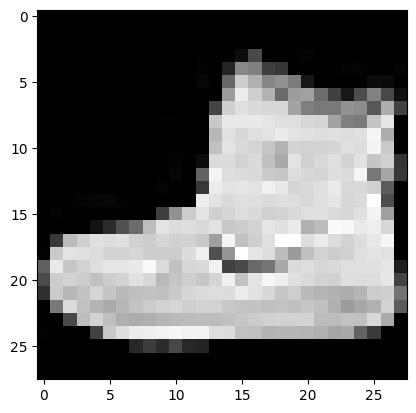

In [114]:
plt.imshow(image.squeeze(), cmap="gray")

In [115]:
image.shape

torch.Size([1, 28, 28])

In [116]:
10*7*7

490

### 7.3 Setup a loss fn and optimizer for model_2

In [117]:
from helper_functions import accuracy_fn

# loss fn
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [118]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 7.4 Training and Testing loops

In [119]:
# Run our image data through train_step() and test_step() functions

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3

# Measure time
from timeit import default_timer
from tqdm import tqdm

train_start_model_2 = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  ### TRAIN
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device) 
  ### TEST
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
    
train_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_start_model_2,
                                            end=train_end_model_2,
                                            device=str(next(model_2.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 0.5942 | Train accuracy: 78.46%


 33%|███▎      | 1/3 [00:13<00:26, 13.32s/it]

Test Loss: 0.3946 | Test accuracy: 85.64%
Epoch: 1
----
Train Loss: 0.3589 | Train accuracy: 87.16%


 67%|██████▋   | 2/3 [00:26<00:13, 13.46s/it]

Test Loss: 0.3549 | Test accuracy: 86.83%
Epoch: 2
----
Train Loss: 0.3230 | Train accuracy: 88.33%


100%|██████████| 3/3 [00:41<00:00, 13.91s/it]

Test Loss: 0.3187 | Test accuracy: 88.55%
Train time on Parameter containing:
tensor([[[[ 0.2827,  0.3208, -0.4290],
          [-0.0171,  0.1484,  0.1188],
          [-0.3890,  0.1404,  0.3381]]],


        [[[-0.4041,  0.5335, -0.2793],
          [ 0.1707,  0.4015,  0.1131],
          [-0.0809,  0.3309,  0.0470]]],


        [[[-0.1935, -0.0813, -0.0520],
          [-0.6085, -0.6247,  0.2437],
          [-0.7832, -0.6580, -0.1273]]],


        [[[-0.7054, -1.0715, -0.6158],
          [ 0.2071, -0.8341,  0.1286],
          [ 0.3720,  0.0162,  0.4658]]],


        [[[-0.0132,  0.3882, -0.0068],
          [-0.0658,  0.2226, -0.0283],
          [ 0.1108,  0.2005,  0.1560]]],


        [[[-0.1465,  0.1863,  0.0569],
          [ 0.1743, -0.2037, -0.3298],
          [-0.1291, -0.2571,  0.2550]]],


        [[[ 0.1661,  0.1501, -0.0064],
          [ 0.1586,  0.2451, -0.2439],
          [ 0.0062, -0.5142, -0.0614]]],


        [[[-0.1787,  0.0269, -0.2410],
          [ 0.3123, -0.2267, -0.2750

In [120]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

100%|██████████| 313/313 [00:01<00:00, 216.61it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31867489218711853,
 'model_acc': 88.54832268370608}

## 8. Comparing model results and training time 

In [121]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.318675,88.548323


In [122]:
# Add training time to results comparison

compare_results["train_time"] = [total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]

In [123]:
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.476639,83.426518,42.424297
1,FashionMNISTModelV1,0.685001,75.019968,43.739281
2,FashionMNISTModelV2,0.318675,88.548323,41.726735


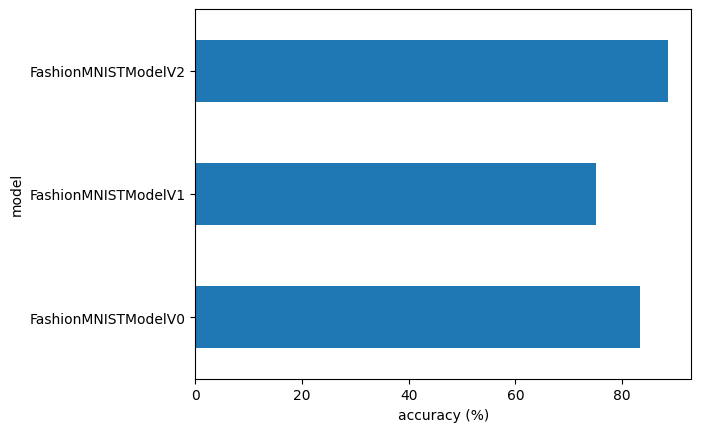

In [124]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.show();

In [125]:
## 9. Make and evaluate random predictions with the best model

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get pred probs (logit -> pred prob)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off GPU for future calculations
      pred_probs.append(pred_prob.cpu())

  # Stack pred probs to turn list to a tensor
  return torch.stack(pred_probs)


In [126]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [127]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

  # View first sample shape
  test_samples[0].shape


Text(0.5, 1.0, 'Ankle boot')

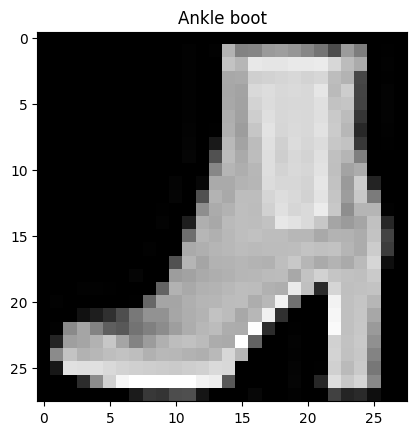

In [128]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [129]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data = test_samples,
                              device=device)

# View first two prediction probs
pred_probs[:2]

tensor([[2.8463e-06, 9.7615e-07, 6.7623e-07, 1.4796e-06, 1.5954e-06, 7.5700e-04,
         2.6356e-05, 2.7201e-05, 1.6268e-05, 9.9917e-01],
        [6.2210e-05, 9.9944e-01, 4.2794e-07, 4.6952e-04, 2.1787e-05, 3.5705e-07,
         5.2375e-06, 5.8554e-07, 1.1206e-07, 2.8106e-08]])

In [130]:
# Convert prediction probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 1, 8, 5, 1, 9, 2, 5, 0])

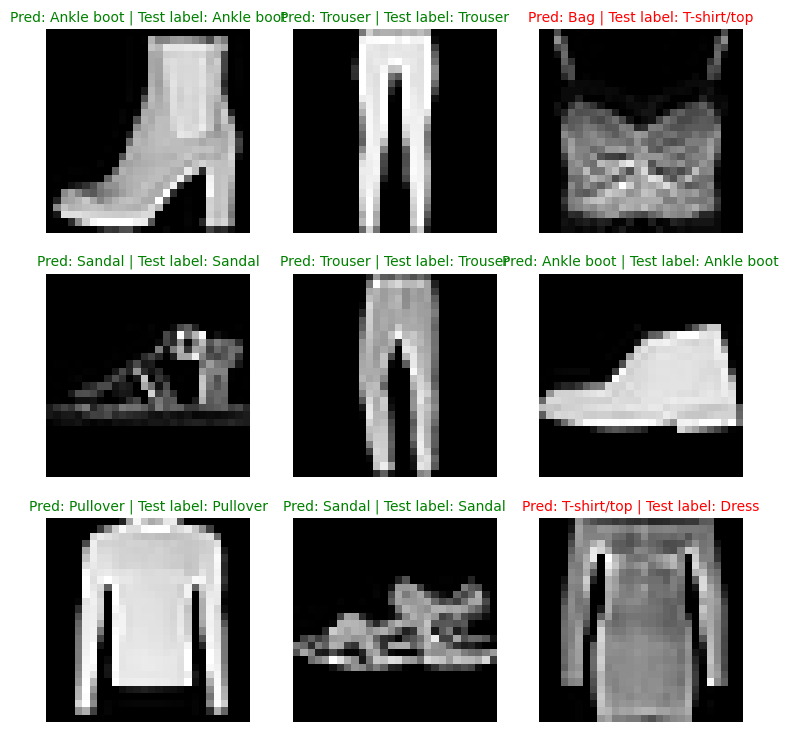

In [131]:
# Plot images with predictions

plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
  # Create subplot for each sample
  plt.subplot(nrows, ncols, i+1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find pred label in text form
  pred_label = class_names[pred_classes[i]]

  # Get truth label in text form
  truth_label = class_names[test_labels[i]]

  # Create title 
  title_text= f"Pred: {pred_label} | Test label: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  
  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with trained model on the test data
2. Make confusion matrix using `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html 
3. Plot confusion matrix using `mlxtend.plotting.plot_confusion_matrix` - https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/ 

In [132]:
# Make predictions with trained model
from tqdm import tqdm

# 1. Make predictions with trained model
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions"):

    # Set data to target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_logits = model_2(X)

    # Convert logits to pred probs -> pred label
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    # Put pred on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatonate list of preds in to tensors
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 217.45it/s]


In [133]:
y_pred_tensor[:10], len(y_pred_tensor)

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [134]:
# Import packages if not installed
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.14.0
mlxtend version: 0.14.0


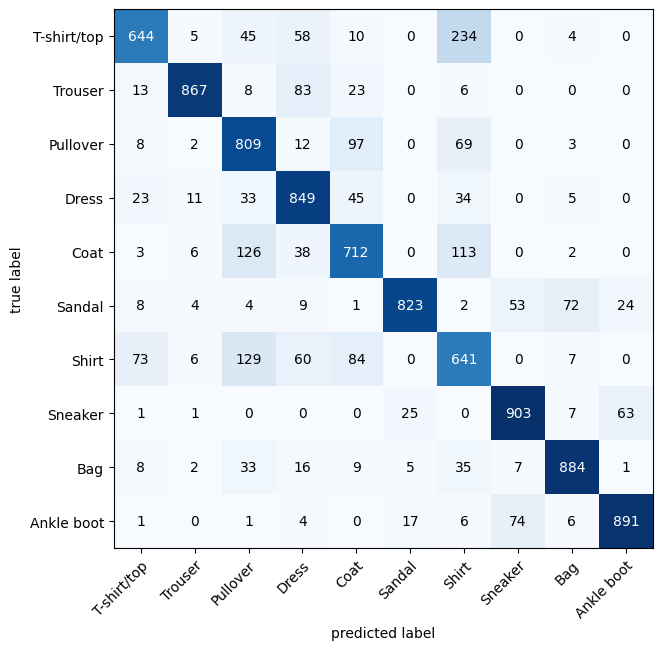

In [153]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize=(10,7)
)

In [152]:
confmat_tensor

tensor([[644,   5,  45,  58,  10,   0, 234,   0,   4,   0],
        [ 13, 867,   8,  83,  23,   0,   6,   0,   0,   0],
        [  8,   2, 809,  12,  97,   0,  69,   0,   3,   0],
        [ 23,  11,  33, 849,  45,   0,  34,   0,   5,   0],
        [  3,   6, 126,  38, 712,   0, 113,   0,   2,   0],
        [  8,   4,   4,   9,   1, 823,   2,  53,  72,  24],
        [ 73,   6, 129,  60,  84,   0, 641,   0,   7,   0],
        [  1,   1,   0,   0,   0,  25,   0, 903,   7,  63],
        [  8,   2,  33,  16,   9,   5,  35,   7, 884,   1],
        [  1,   0,   1,   4,   0,  17,   6,  74,   6, 891]])

## 11. Save and load best performing model 

In [157]:
# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [162]:
# Save model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/03_pytorch_computer_vision_model_2.pth


In [163]:
# Create new instance of model_2

torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in saved state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [166]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

100%|██████████| 313/313 [00:02<00:00, 118.56it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31867489218711853,
 'model_acc': 88.54832268370608}

In [164]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31867489218711853,
 'model_acc': 88.54832268370608}

In [168]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)